In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing data set
df = pd.read_csv('mnist_train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Data frame to np array
data = df.values

# splitting data into train and test
split = int(.99*data.shape[0])
train_data, test_data = data[:split,:], data[split:,:]

In [4]:
# slicing data into features and labels
X,y = train_data[:,1:],train_data[:,0]
x_test, y_test = test_data[:,1:], test_data[:,0]
print(X.shape, y.shape, x_test.shape, y_test.shape)

(41580, 784) (41580,) (420, 784) (420,)


In [5]:
# plotting a picture of example
def picture_it(x):
    pic = x.reshape(28,-1)
    plt.imshow(pic, cmap = 'gray')
    plt.show()

In [6]:
# finding k nearest neighbourhood of point a
def distance(a,k):
    dist = np.sqrt(np.sum((X-a)**2, axis = 1))[np.newaxis].T # vector of all the distances from point a to all the points in dataset
    new_mat = np.hstack([dist,train_data]) # stacking training data with distance vector to access corresponding labels and points
    sortedArr = new_mat[new_mat[:,0].argsort()]
    knn = sortedArr[0:k,:]
    return knn

In [7]:
def prediction(a,k):
    dist = distance(a,k)
#     print(dist[:,1])
    l = []
    for i in range(10):
        l.append((dist[:,1] == i).sum())
#     print(l)
    c = l.index(max(l))
    picture_it(a)
    print('this is the picture of ', c)
    return c

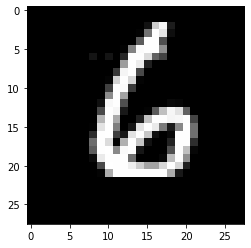

this is the picture of  6


6

In [8]:
prediction(x_test[44],5) # prediction takes examples from the test set

In [9]:
# Function to check accuracy of knn
def accuracy (k):
    n = 0
    for i in range(x_test.shape[0]):
        l = i*100/x_test.shape[0]
        digit = x_test[i,:]
        p = prediction(digit,k)
        if p == y_test[i]:
            n += 1
        return n/(i+1)